# PCA on IRIS Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Separate the features and the target variable.
X = df.drop(columns='Class')
y = df['Class']

In [4]:
# Subtract the mean value from each feature.
X = X - X.mean()
X.head()

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [5]:
cov_matrix = np.cov(X, rowvar=False) # It disables the assumption that row contains variables or features.
cov_matrix.shape # There are 12 features

(4, 4)

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors 

(array([4.22484077, 0.24224357, 0.07852391, 0.02368303]),
 array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
        [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
        [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
        [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]]))

In [7]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_indices

array([0, 1, 2, 3], dtype=int64)

In [8]:
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvalues

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [9]:
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvectors

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [10]:
eigenvalues_sum = np.sum(eigenvalues)
var_of_proportion = sorted_eigenvalues / eigenvalues_sum
var_of_proportion

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [11]:
num_components = np.argmax(var_of_proportion >= 0.95) + 1
num_components # Only one component

1

In [12]:
for i, value in enumerate(var_of_proportion):
    if value >=0.05:
        print(f"Index: {i}")

Index: 0
Index: 1


In [16]:
transformed_data_1D = np.dot(X, sorted_eigenvectors[:, 0])
transformed_data_1D.shape

(150,)

In [27]:
target_names = df['Class'].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

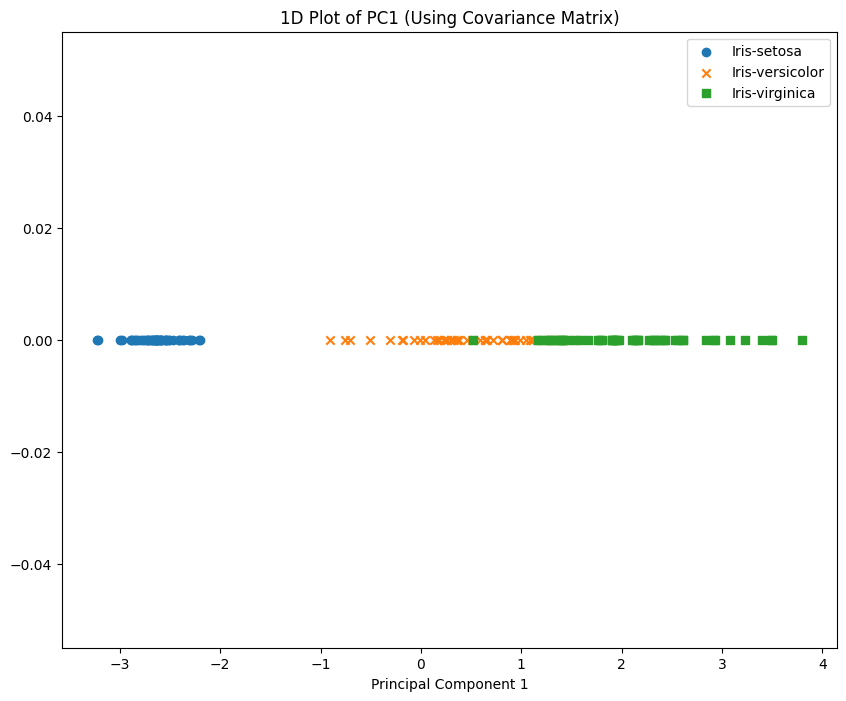

In [28]:
# Plot the data values 
target_names = df['Class'].unique()
markers = ['o', 'x', 's', 'v']

plt.figure(figsize=(10,8))

for k in range(len(target_names)):
    plt.scatter(transformed_data_1D[y == target_names[k]], np.zeros_like(transformed_data_1D[y == target_names[k]]), marker=markers[k], label=target_names[k])
plt.xlabel('Principal Component 1')
plt.title('1D Plot of PC1 (Using Covariance Matrix)')
plt.legend()
plt.show()


In [34]:
principal_components = np.dot(X, sorted_eigenvectors)
principal_components

array([[-2.68420713e+00, -3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00,  1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00,  1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00,  3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00, -3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02],
       [-2.27989736e+00, -7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.82089068e+00,  8.21045110e-02,  2.64251085e-01,
        -5.00996251e-02],
       [-2.62648199e+00, -1.70405349e-01, -1.58015103e-02,
        -4.62817610e-02],
       [-2.88795857e+00,  5.70798026e-01,  2.73354061e-02,
        -2.66154143e-02],
       [-2.67384469e+00,  1.06691704e-01, -1.91533300e-01,
        -5.58909660e-02],
       [-2.50652679e+00, -6.51935014e-01, -6.92749958e-02,
        -1.66082478e-02],
       [-2.61314272e+00, -2.15206320e-02,  1.07650353e-01,
      

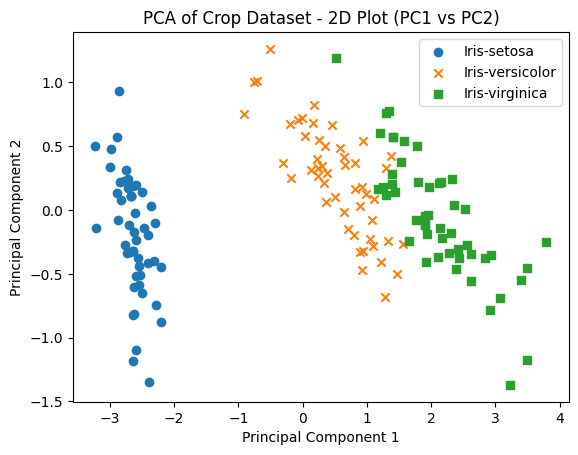

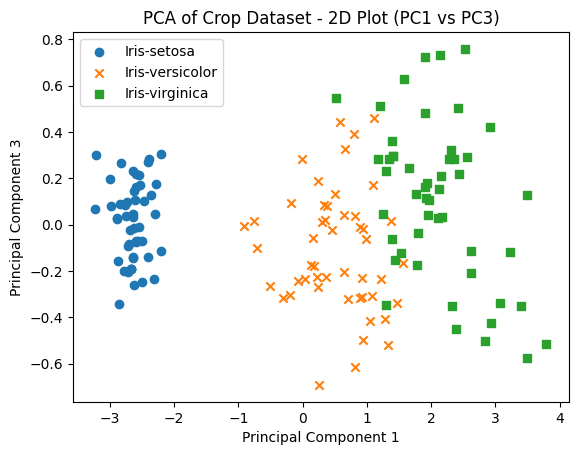

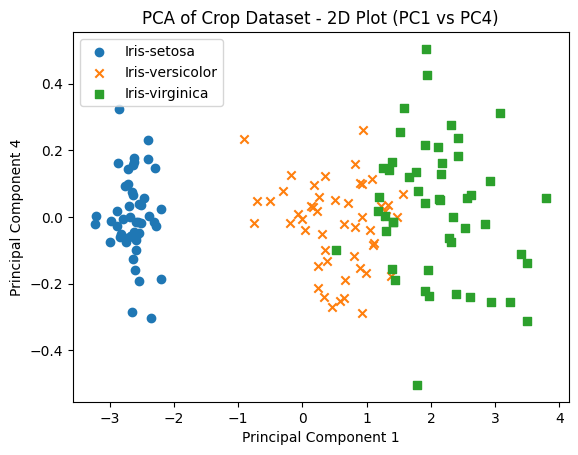

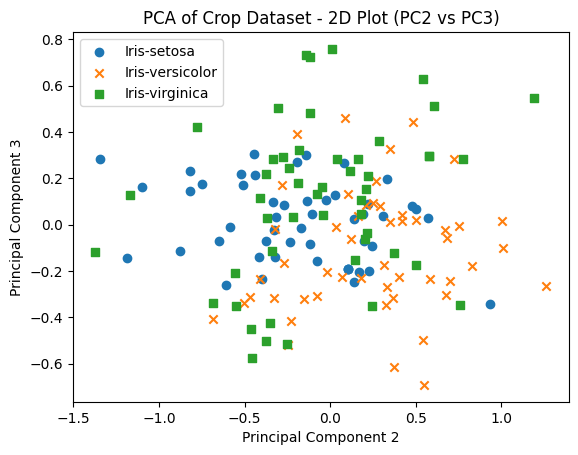

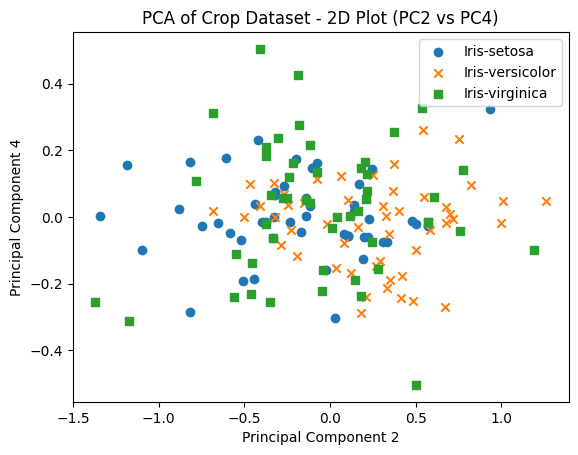

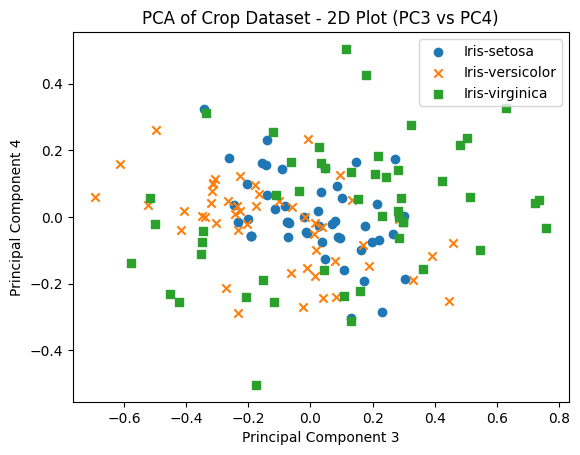

In [40]:
figures_2d = []
num_components = 4

# 2D plots
for i in range(num_components - 1):
    for j in range(i + 1, num_components):
        fig = plt.figure()
        for k, target_name in enumerate(target_names):
            plt.scatter(principal_components[y == target_name, i], principal_components[y == target_name, j],
                        marker=markers[k], label=target_name)
        plt.xlabel('Principal Component {}'.format(i + 1))
        plt.ylabel('Principal Component {}'.format(j + 1))
        plt.legend()
        plt.title('PCA of Crop Dataset - 2D Plot (PC{} vs PC{})'.format(i + 1, j + 1))
        # Append the figure to the 2D figures array
        figures_2d.append(fig)

# Save the figures as images
for i, fig in enumerate(figures_2d):
    fig.savefig('2D_plot_{}.png'.format(i + 1)) 

plt.show()


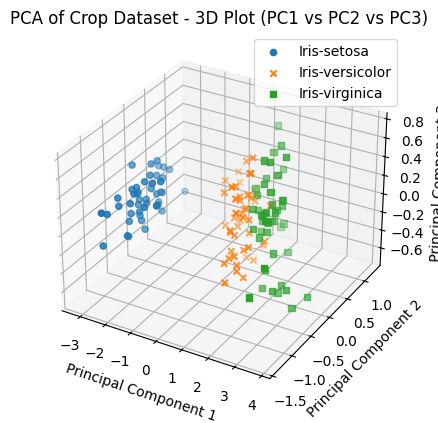

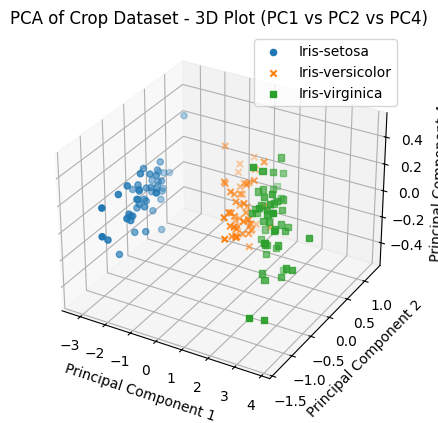

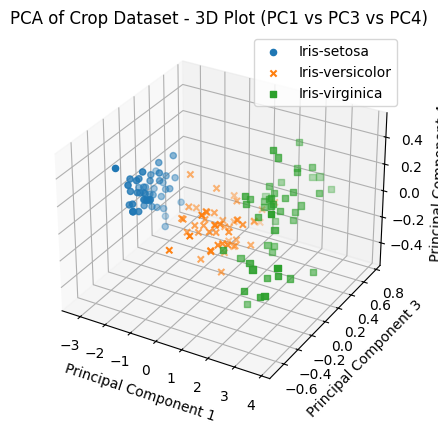

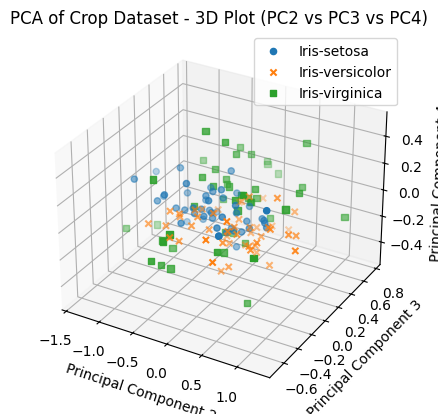

In [42]:
figures_3d = []

# 3D plots
combinations = list(itertools.combinations(range(num_components), 3))

for pc1, pc2, pc3 in combinations:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for k, target_name in enumerate(target_names):
        ax.scatter(principal_components[y == target_name, pc1], principal_components[y == target_name, pc2],
                   principal_components[y == target_name, pc3], marker=markers[k])
    ax.set_xlabel('Principal Component {}'.format(pc1 + 1))
    ax.set_ylabel('Principal Component {}'.format(pc2 + 1))
    ax.set_zlabel('Principal Component {}'.format(pc3 + 1))
    ax.legend(target_names)
    ax.set_title('PCA of Crop Dataset - 3D Plot (PC{} vs PC{} vs PC{})'.format(pc1 + 1, pc2 + 1, pc3 + 1))
    # Append the figure to the 3D figures array
    figures_3d.append(fig)
    

for i, fig in enumerate(figures_3d):
    fig.savefig('3D_plot_{}.png'.format(i + 1))

# Display the figures
plt.show()
